<a href="https://www.kaggle.com/code/yannicksteph/cnn-mnist-classification?scriptVersionId=138879596" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# | CNN | MNIST | Classification |
## Convolutional Neural Networks (CNN) with Computer Vision (CV) for MNIST Handwriting Classification

# <b>1. <span style='color:#78D118'>|</span> Introduction</b>

This notebook delves into a classification task involving the use of Convolutional Neural Networks (CNNs) on the famous MNIST dataset, available at [Yann LeCun's website](http://yann.lecun.com/exdb/mnist/).

We have structured the notebook into two main sections:

## Objectives
This section delineates the specific goals of this notebook, which are:

- Training a Deep Neural Network (DNN) model to achieve high accuracy in recognizing handwritten digits.

## Implementation
This section presents the hands-on steps necessary to attain the previously mentioned objectives. These steps include:

1. **Imports, Constants, and Methods:** Setting up the necessary libraries, constants, and methods for our task.
2. **Data Retrieval:** Acquiring the MNIST dataset to be used for training and testing purposes.
3. **Data Preparation:** Preprocessing and setting up the dataset to facilitate effective training of the CNN model.
4. **Model Creation:** Architecting and constructing the CNN model utilizing Keras.
5. **Model Training:** Engaging the CNN model in learning using the prepared dataset.
6. **Evaluation:** Gauging the trained model's performance and analyzing the classification results.

# <b>2. <span style='color:#78D118'>|</span> Imports & Constants</b>

## <b>2.1. <span style='color:#78D118'>|</span> Imports</b>

In [31]:
!pip install -q git+https://github.com/YanSteph/SKit.git@0.0.3
!pip install -q visualkeras

In [32]:
# Importing Python's standard libraries
import sys, os
import math
from importlib import reload
import warnings  # For ignoring warnings

# Importing libraries for numerical and scientific computations
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics
from sklearn.utils import shuffle

# Importing TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow import keras

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import visualkeras

# Configurations
warnings.filterwarnings("ignore")  # Ignore warnings

# Custom lib
from smartkit.show import show_images, show_history, show_confusion_matrix

## <b>2.2. <span style='color:#78D118'>|</span> Constants</b>

To customize the dataset generation, you have the option to perform tests or generate the entire enhanced dataset by adjusting the following parameters:

For the current training configuration:
- `batch_size`: Which determines the number of samples processed in each training iteration.
- `epochs`: Indicating the total number of times the model will be trained on the entire dataset.

Verbosity during training:
- 0: Silent mode, no output will be displayed during training.
- 1: Progress bar mode, a progress bar will be displayed to show the progress of each epoch.
- 2: One line per epoch mode, a concise summary will be displayed for each epoch.

In [33]:
# Test
# ----
# batch_size  = 256
# epochs      =  8
# seed        = 123

# Best
# ----
batch_size  = 512
epochs      = 64
seed        = 123

# Verbosity
# ----
fit_verbosity = 2

# <b>3. <span style='color:#78D118'>|</span> Retrieve data</b>

In this step, we will be loading the following subsets of our dataset:

- **Train** subset: This forms our training dataset, which will be used to train the model. We'll refer to the input and output data as `x_train` and `y_train` respectively.
- **Test** subset: This is our validation dataset, used to evaluate the performance of the model during and after training. The input and output data for this subset will be referred to as `x_test` and `y_test`.

In [34]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, y_train = shuffle(x_train, y_train, random_state = seed) # Shuffling 

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


# <b>4. <span style='color:#78D118'>|</span> Preparing the data</b>

In [35]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 1)).reshape(x_train.shape)
x_test = scaler.transform(x_test.reshape(-1, 1)).reshape(x_test.shape)

print('After normalization : Min={}, max={}'.format(x_train.min(), x_test.max()))

Before normalization : Min=0, max=255
After normalization : Min=0.0, max=1.0


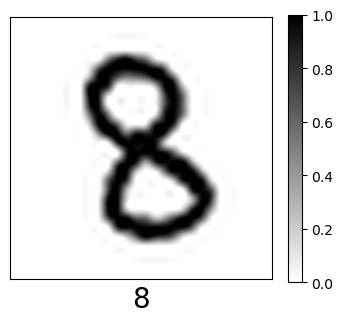

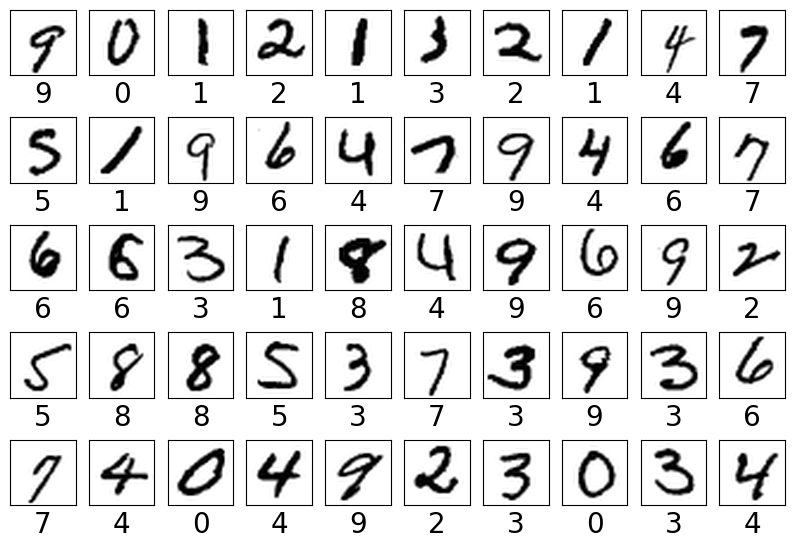

In [36]:
show_images(x_train, y_train, [9], figure_size = (5,5 ), show_colorbar=True)
show_images(x_train, y_train, range(50,100), columns=10)

# <b>5. <span style='color:#78D118'>|</span> Create model</b>

Information about:
- [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers): Determines how the model is updated based on the gradients computed during training.
- [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations): Determines the shape of the output from a neural network layer. It adds non-linearity to the model.
- [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses): Measures how different the model's predictions are from the target values. It is used to guide the model's optimization.
- [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics): Measures used to evaluate the performance of the model, such as accuracy, precision, recall, etc.

In [37]:
model = keras.models.Sequential()

model.add( keras.layers.Input((28,28,1)) )

model.add( keras.layers.Conv2D(8, (3,3),  activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(100, activation='relu'))
model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Dense(10, activation='softmax'))

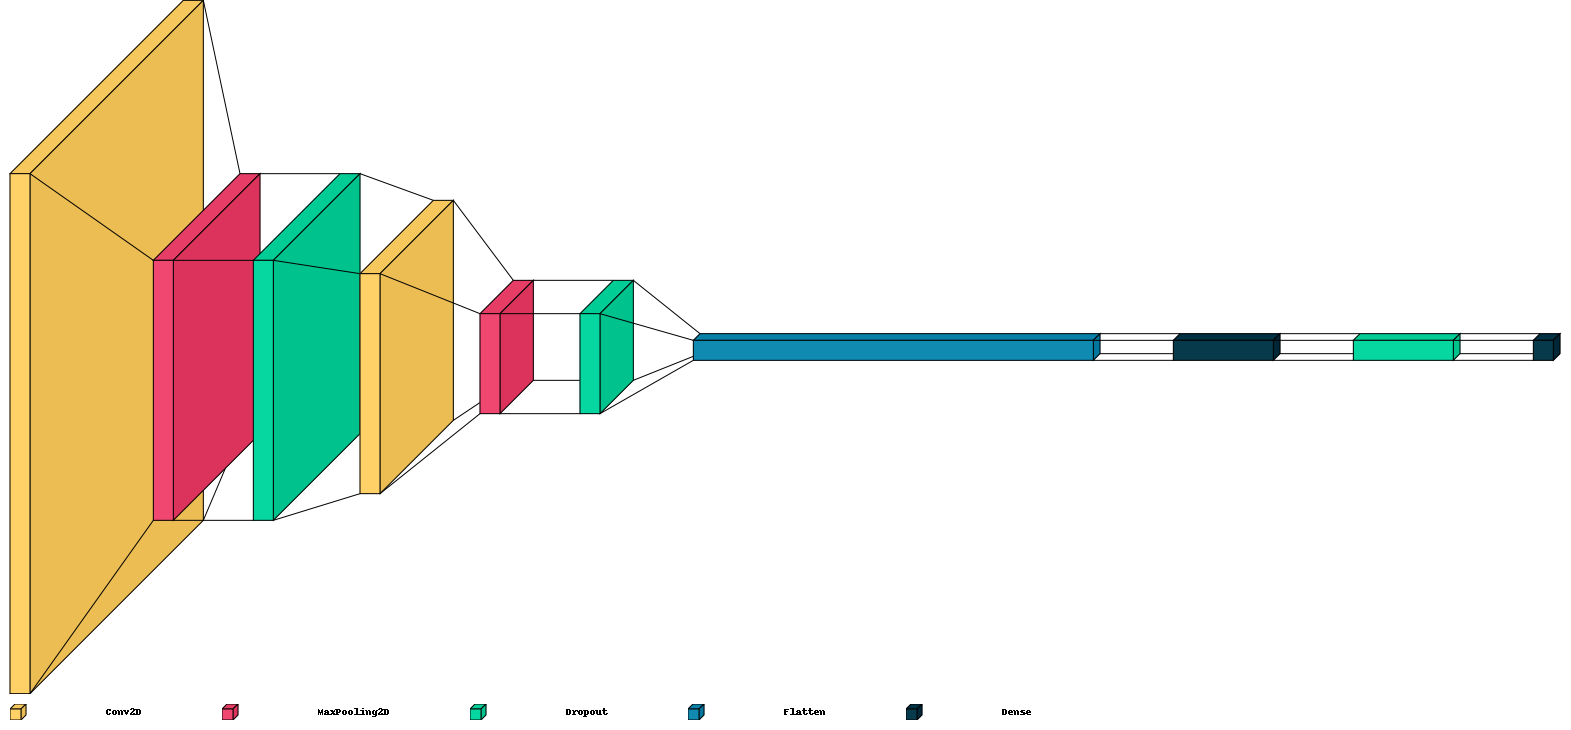

In [38]:
visualkeras.layered_view(model, legend=True, scale_z=1, scale_xy =20, spacing=80)

In [39]:
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 8)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 16)         

# <b>6. <span style='color:#78D118'>|</span> Train the model</b>

In [40]:
history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = fit_verbosity,
                      validation_data = (x_test, y_test))

Epoch 1/64


2023-08-04 09:09:46.382863: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


118/118 - 2s - loss: 1.0953 - accuracy: 0.6370 - val_loss: 0.2559 - val_accuracy: 0.9337 - 2s/epoch - 20ms/step
Epoch 2/64
118/118 - 1s - loss: 0.3765 - accuracy: 0.8831 - val_loss: 0.1411 - val_accuracy: 0.9591 - 562ms/epoch - 5ms/step
Epoch 3/64
118/118 - 1s - loss: 0.2725 - accuracy: 0.9172 - val_loss: 0.1080 - val_accuracy: 0.9683 - 559ms/epoch - 5ms/step
Epoch 4/64
118/118 - 1s - loss: 0.2252 - accuracy: 0.9315 - val_loss: 0.0882 - val_accuracy: 0.9736 - 548ms/epoch - 5ms/step
Epoch 5/64
118/118 - 1s - loss: 0.1993 - accuracy: 0.9400 - val_loss: 0.0769 - val_accuracy: 0.9762 - 548ms/epoch - 5ms/step
Epoch 6/64
118/118 - 1s - loss: 0.1786 - accuracy: 0.9459 - val_loss: 0.0678 - val_accuracy: 0.9785 - 546ms/epoch - 5ms/step
Epoch 7/64
118/118 - 1s - loss: 0.1620 - accuracy: 0.9509 - val_loss: 0.0615 - val_accuracy: 0.9808 - 566ms/epoch - 5ms/step
Epoch 8/64
118/118 - 1s - loss: 0.1524 - accuracy: 0.9537 - val_loss: 0.0559 - val_accuracy: 0.9822 - 566ms/epoch - 5ms/step
Epoch 9/64
11

# <b>7. <span style='color:#78D118'>|</span> Evaluate</b>

**Note** : With a DNN, we had a precision of the order of : 97.7%

In [41]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.0239
Test accuracy : 0.9928


## <b>7.1. <span style='color:#78D118'>|</span> History</b>

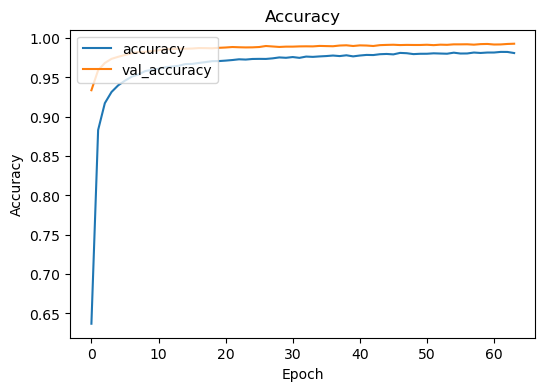

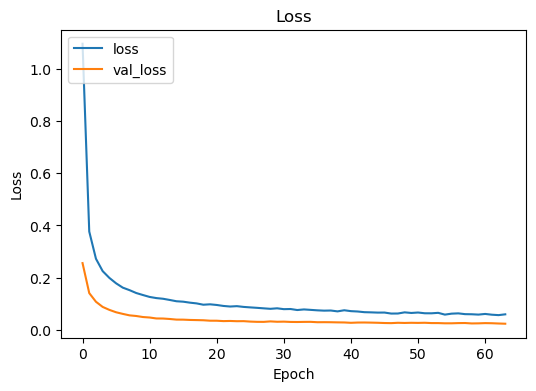

In [42]:
show_history(history, figsize=(6,4))

## <b>7.2. <span style='color:#78D118'>|</span> Results</b>

313/313 [==============================] - 1s 2ms/step


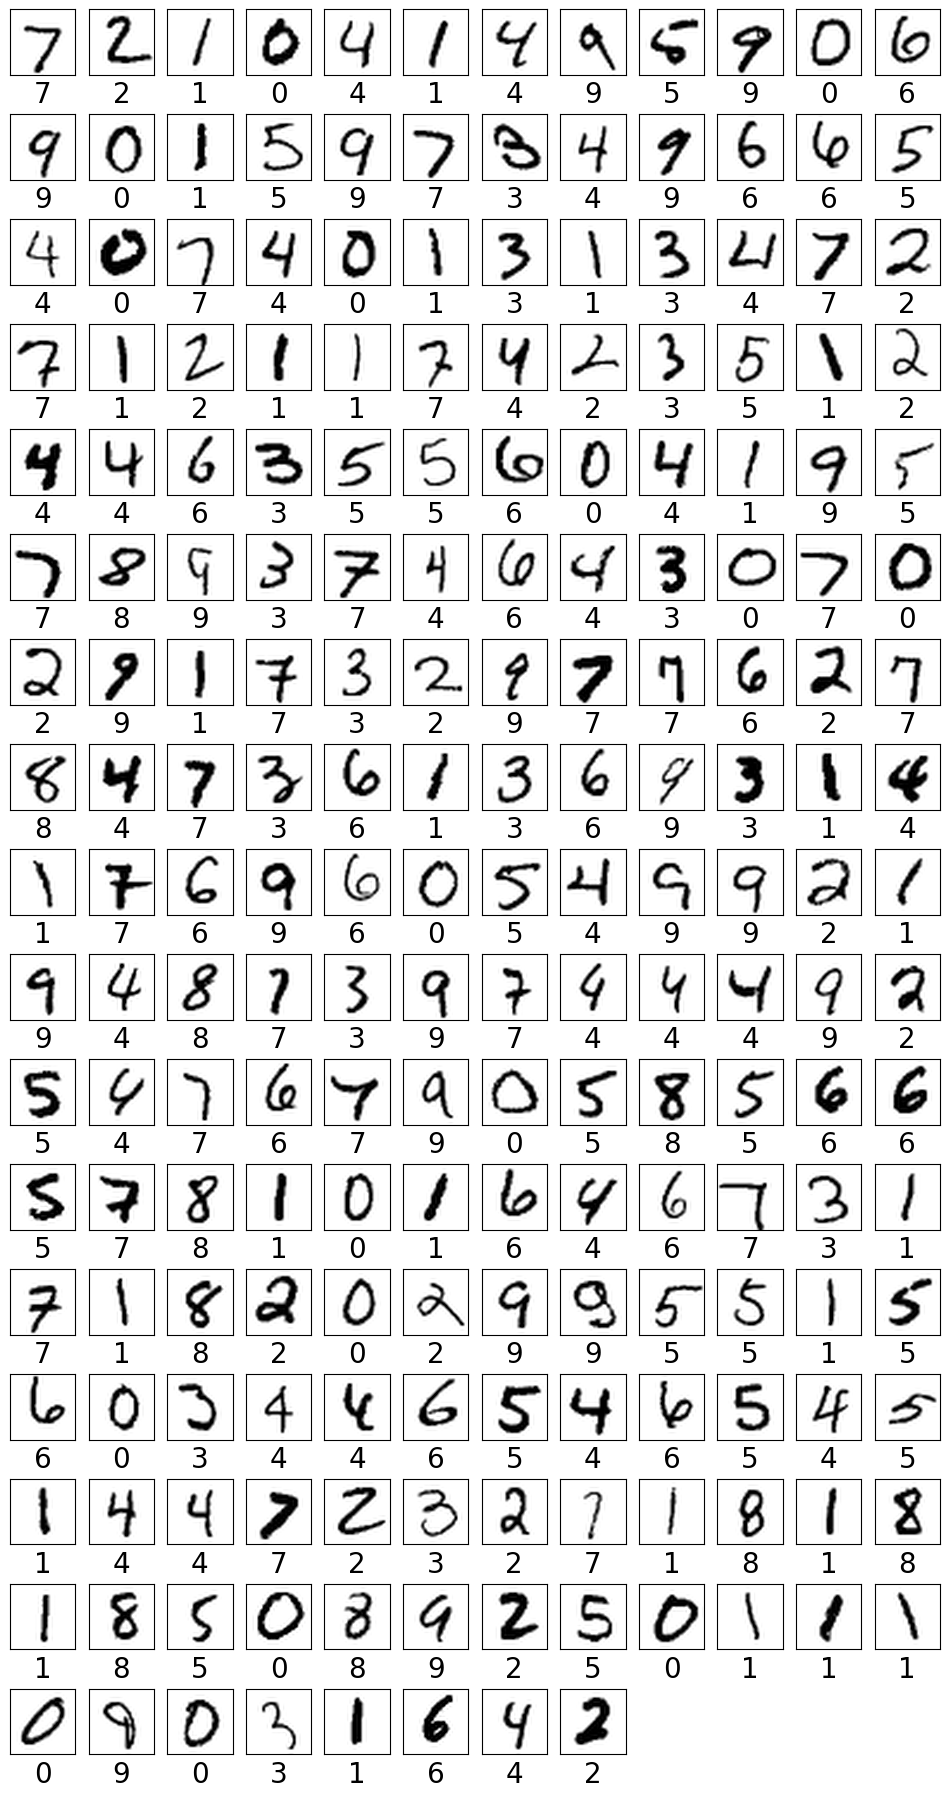

In [43]:
y_probabilities = model.predict(x_test)
y_pred    = np.argmax(y_probabilities, axis=-1)


show_images(x_test, y_test, range(0,200), columns=12, figure_size = (1,1), y_pred=y_pred)

## <b>7.3. <span style='color:#78D118'>|</span> Errors</b>

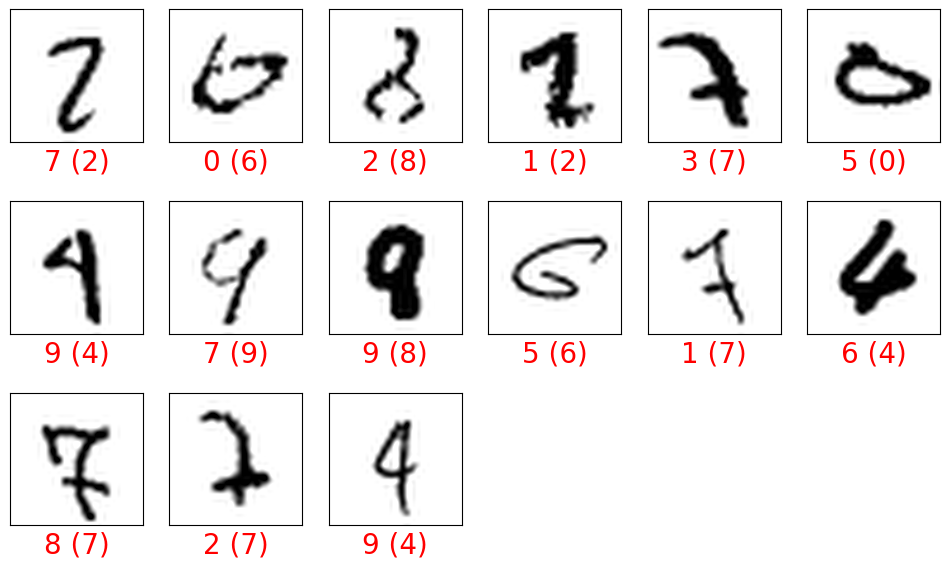

In [44]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
show_images(x_test, y_test, errors[:15], columns=6, figure_size = (2,2), y_pred=y_pred)

## <b>7.4. <span style='color:#78D118'>|</span> Confusion Matrix</b>

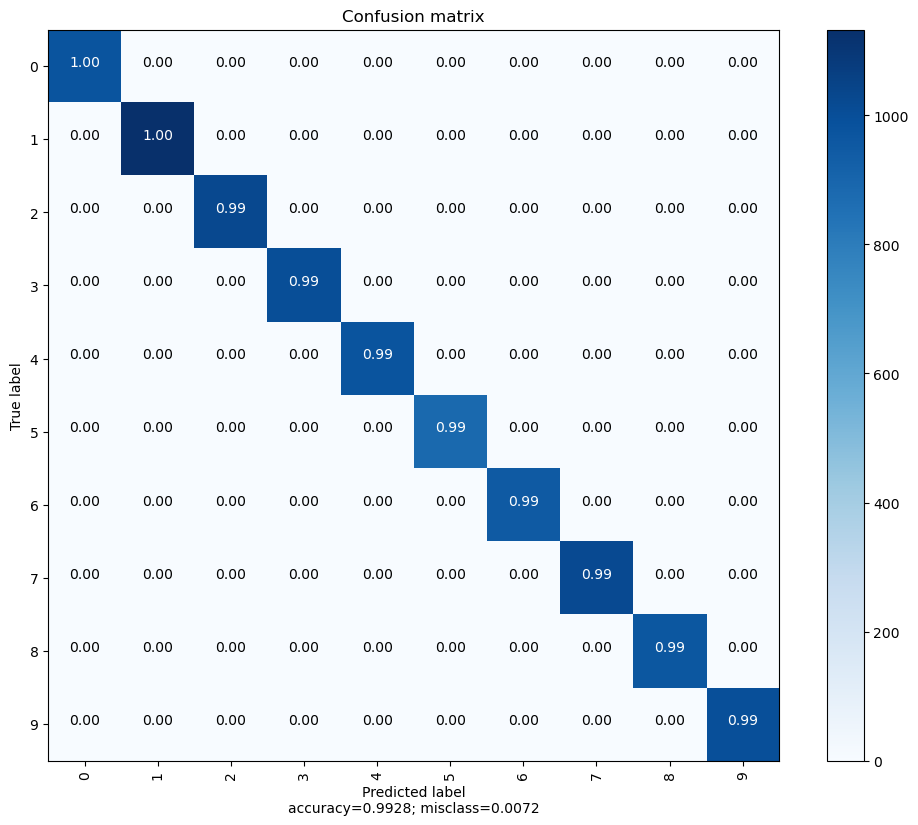

In [45]:
show_confusion_matrix(y_test,y_pred,range(10),normalize=True)

## References

The creation of this document was greatly influenced by the following key sources of information:

1. [Yann LeCun's website](http://yann.lecun.com/exdb/mnist/) - This is the official site for the MNIST dataset, providing crucial details about the data structure and its applications.
2. [Keras Datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) - An invaluable resource for accessing and understanding various Keras datasets, including MNIST.
3. [Fidle](https://gricad-gitlab.univ-grenoble-alpes.fr/talks/fidle/-/wikis/home) - An informative guide that provides in-depth explanations and examples on various data science topics.